In [ ]:
""" 
Analysis of copy strategy 12

"""

In [1]:
%load_ext autoreload
%autoreload 2

%cd ..

/data1/code/python/drawmonkey


In [2]:
from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *
from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *

NOTE: need to not overwrite strokes_all_task, because then the orders saved will stop being accurate. Modify


In [3]:
animal = "Red";
date = 200715
expt = "pilot"
session = 1

from tools.preprocess import *
fd = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                      resave_overwrite=False)

found one matching filename: ['/data2/animals/Red/200715/200715_154548_pilot_Red_1.h5']
found one matching filename: ['/data2/animals/Red/200715/200715_154548_pilot_Red_1.pkl']
-- loaded presaved data: /data2/animals/Red/200715/200715_154548_pilot_Red_1.pkl


In [4]:

############ START HERE
import seaborn as sns

# === get dataframe, including block categories
df = extractSessionDf(fd)
yplot = "hausdorff"
# yplot = "behscore"


got 626 total trials


# (1) Does score incresae over bloques, for bloques, where fade is complete?
I think that fade of 0.03 or less is probably complete, based on behavior.

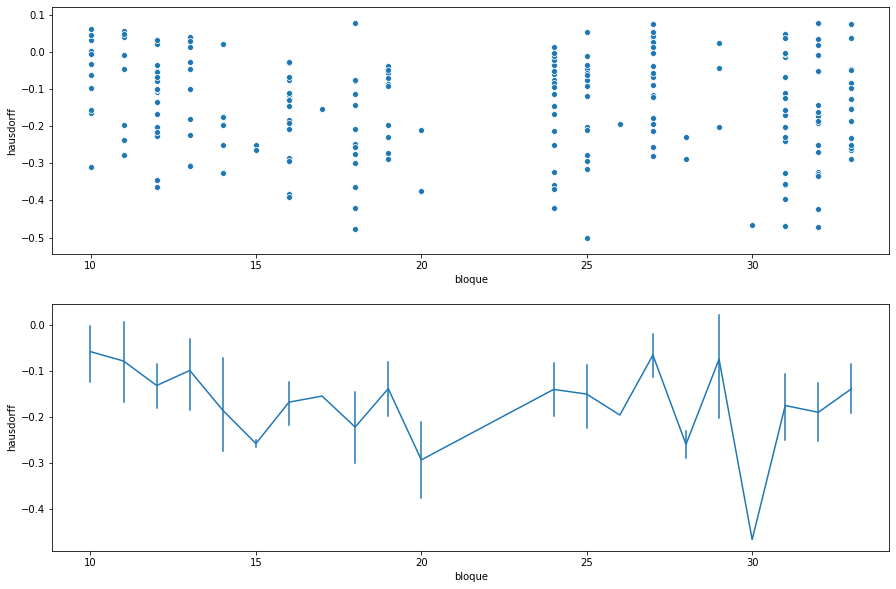

In [6]:

if animal=="Red":
    ALPHA_INVISIBLE = 0.05 # below this, invisible.
elif animal=="Pancho":
    ALPHA_INVISIBLE = 0.03
else:
    assert False
dfthis = df[(df["fade_samp1"]<ALPHA_INVISIBLE) & (df["fade_guide1task"]<ALPHA_INVISIBLE) & (df["fade_guide1fix"]<ALPHA_INVISIBLE)]

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.scatterplot(x = "bloque", y="hausdorff", data=dfthis)
plt.subplot(2,1,2)
sns.lineplot(x = "bloque", y="hausdorff", data=dfthis, err_style="bars")


## (2) Should see correlation between fade and hausdorff [sanity check]
Indeed looks like big dropoff around fade <0.03, as I suspected based on my notes.
Does look like potnetially increasing dropoff after 0.03, suggesting that still using some information from samp.

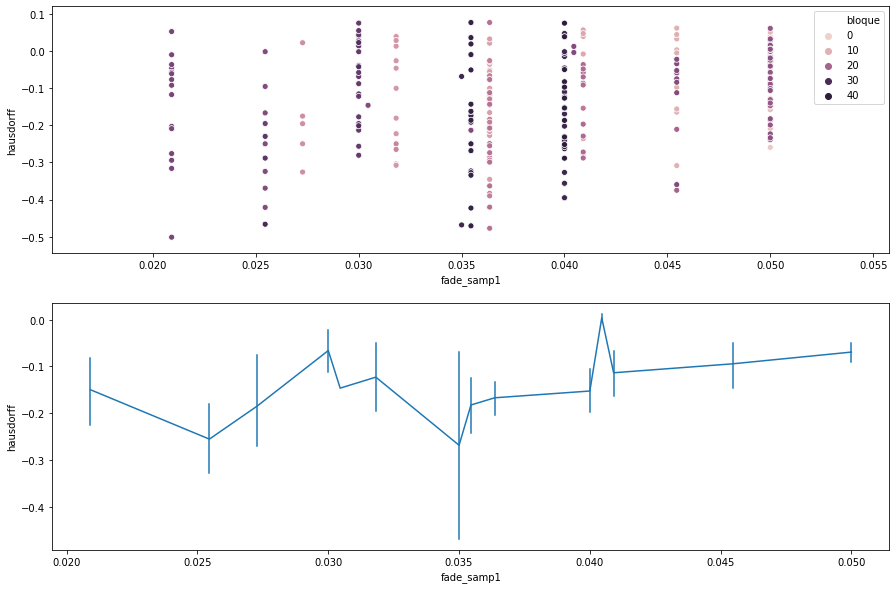

In [7]:

ALPHA_MAX = 0.2 
dfthis = df[(df["fade_samp1"]<ALPHA_MAX) & (df["fade_guide1task"]<ALPHA_MAX) & (df["fade_guide1fix"]<ALPHA_MAX)]

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.scatterplot(x = "fade_samp1", y="hausdorff", data=dfthis, hue="bloque")
plt.subplot(2,1,2)
sns.lineplot(x = "fade_samp1", y="hausdorff", data=dfthis, err_style="bars")


## BELOW: visualizing drawings. Did not do

In [9]:
## === WHICH TRIALS?
if True:
    # Filter by fade values
    dfthis = df[(df["fade_samp1"]<ALPHA_INVISIBLE) & (df["fade_guide1task"]<ALPHA_INVISIBLE) & (df["fade_guide1fix"]<ALPHA_INVISIBLE)]
    trials_list_all = dfthis["trial"].values

else:
    # 1) Load into stroke dict
    # -- collect d## FILTER TO FIND GOOD TRIALS, - PLOT THOSE
    # --- for a given set of trials, collect trajectories for all of them
    targ = {
        "blockcategory":[12],
    #     "task_stage":["line"],
    }

    trials_list_all = getIndsTrials(fd, targ, keep_only_if_go=True, keep_only_if_clean_strokes=True)


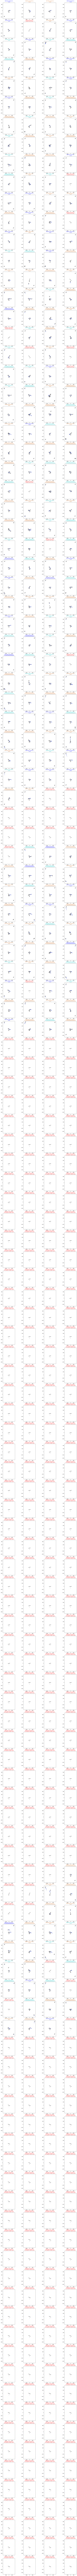

In [10]:
####  VISUALIZE, OVERLAID ON SAME PLOT

##################### 1) Plot raw, each trial
%matplotlib inline
plotMultTrialsSimple(fd, trials_list_all, zoom=False)

In [ ]:
# === plot separately, binn

In [ ]:
# %matplotlib notebook

##################### 2) Overlay all
filedata= fd
faketimesteps_ver = "from_orig"
ALIGN_BY = "ownmidpt"
ROTATE_BY = "task_first_stroke"
SCALE_BY = "task_first_stroke"
subsample_trials = None

if subsample_trials is not None:
    trials_list = random.sample(trials_list_all, subsample_trials)
    print(trials_list)
else:
    trials_list = trials_list_all


# 1) Preprocess data
stroke_dict = getMultTrialsStrokeDict(filedata, trials_list)
stroke_dict = processFakeTimesteps(stroke_dict, filedata, key_to_do="strokes_all_task",
                                   ver=faketimesteps_ver, replace_key_to_do=True)
stroke_dict = processAngles(stroke_dict)

# fig, axes = plt.subplots(3,2, figsize=(3*5, 2*5))
# fig.subplots_adjust(hspace=0.08, wspace=-0.35)

# # == 1) Plot in original space, trials + first touch point
# ax = axes[0][0]
# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
#                       title="", strokes_to_plot="first", 
#                      plotver=[0.8, 0.8, 0.8], ax=ax)

# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
#                       title="", strokes_to_plot="first", 
#                      plotver="raw", ax=ax)

# # == 1) Plot in original space, trials + first touch point
# ax = axes[0][1]
# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
#                       title="", strokes_to_plot="first", 
#                      plotver=[0.8, 0.8, 0.8], ax=ax)

# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
#                       title="", strokes_to_plot="first_touch", 
#                      plotver="onecolor", ax=ax)

if len(trials_list)<10:
    alpha_task = 0.4
    alpha_beh = 0.3
else:
    alpha_task = 0.05
    alpha_beh = 0.1

# # == 2) Plot touch, aligned to origin 
# ax = axes[1][0]
# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
#                       title="", strokes_to_plot="first", 
#                      plotver=[0.8, 0.8, 0.8], align_by=ALIGN_BY, scale_by=SCALE_BY,
#                           rotate_by=ROTATE_BY, alpha_force=alpha_task, ax=ax)
# plt.plot(0,0, 'kx')

# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
#                       title=f"align by {faketimesteps_ver}", strokes_to_plot="first_touch", 
#                      plotver="onecolor", align_by=ALIGN_BY, scale_by=SCALE_BY,
#                      rotate_by=ROTATE_BY, alpha_force=alpha_beh, ax=ax)
# plt.plot(0,0, 'kx')

# == 2) Plot strokes, aligned to origin 
# ax = axes[1][1]
# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
#                       title="", strokes_to_plot="first", 
#                      plotver=[0.8, 0.8, 0.8], align_by=ALIGN_BY, scale_by=SCALE_BY,
#                           rotate_by=ROTATE_BY, alpha_force=alpha_task, ax=ax)
# plt.plot(0,0, 'kx')

# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
#                       title=f"align by {faketimesteps_ver}", strokes_to_plot="first", 
#                      plotver="raw", align_by=ALIGN_BY, scale_by=SCALE_BY,
#                      rotate_by=ROTATE_BY, alpha_force=alpha_beh, ax=ax)
# plt.plot(0,0, 'kx')

# == 2) Plot strokes, aligned to own midpoint
plt.figure()
ax = plt.subplot(111)
plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                      title="", strokes_to_plot="first", 
                     plotver=[0.8, 0.8, 0.8], align_by=ALIGN_BY, scale_by=SCALE_BY,
                          rotate_by=ROTATE_BY, alpha_force=alpha_task, ax=ax)
plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
                      title=f"align by {faketimesteps_ver}", strokes_to_plot="all", 
                     plotver="onecolor", align_by=ALIGN_BY, scale_by=SCALE_BY,
                     rotate_by=ROTATE_BY, alpha_force=alpha_beh, ax=ax)
plt.plot(0,0, 'xk')

In [ ]:
### CORRELATION BETWEEN ANGLE OF SAMP AND BEHAVIOR


In [ ]:
fd["TrialRecord"]["User"]["TrialData"]["2"]["allPeanutPos"][2]